In [14]:
''' Data Profiling : kegiatan merangkum dataset menggunakan statistic deskritif.
Tujuan : utk memiliki pemahaman yg kuat tentang data sehingga dapat mulai
menyusun framework analisa dan menvisualisasikan data
'''

import pandas as pd
import numpy as np
import io
retail_raw = pd.read_csv("retail_raw_reduced_data_quality.csv")
print(retail_raw)

      order_id  order_date  customer_id             city     province  \
0      1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta   
1      1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
2      1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta   
3      1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta   
4      1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4995   1724011  01/12/2019        12838        Tangerang       Banten   
4996   1676302  28/07/2019        13833            Bogor   Jawa Barat   
4997   1706071  23/10/2019        16332    Jakarta Timur  DKI Jakarta   
4998   1703620  17/10/2019        13055    Jakarta Barat  DKI Jakarta   
4999   1720036  24/11/2019        17609    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price  
0         P1910  BRAND_J      10.0    740000.0  
1         P2934  BRAND_R 

In [8]:
print(retail_raw.dtypes)  # .dtypes : cek tipe data disetiap kolom

order_id         int64
order_date      object
customer_id      int64
city            object
province        object
product_id      object
brand           object
quantity       float64
item_price     float64
dtype: object


In [26]:
# Deskriptif Statistic : 
# len - menghitung jumlah kolom (termasuk nilai null)

length_city = len(retail_raw["city"])      # kolom city
print("Lenght kolom city:", length_city)

length_product_id = len(retail_raw["product_id"])      # kolom product_id
print("Length kolom product_id:",length_product_id)

Lenght kolom city: 5000
Length kolom product_id: 5000


In [30]:
# count : menghitung jumlah pengamatan non-NA / non-null dalam suatu series / column.
# Fungsi len - hanya menghitung elemen dari kolom yang mempunyai nilai (exclude missing value).

count_city = retail_raw["city"].count()
print("Count kolom count_city:", count_city)

count_product_id = retail_raw["product_id"].count()
print("Count kolom count_product_id:", count_product_id)

Count kolom count_city: 4984
Count kolom count_product_id: 4989


In [34]:
# missing value : menghitung jumlah missing value (Jumlah nilai yang hilang adalah perbedaan antara Length dan Count)

number_of_missing_value_city = length_city - count_city
float_of_missing_values_city = float(number_of_missing_value_city/length_city)
pct_of_missing_values_city = '{0:.1F}%'.format(float_of_missing_values_city * 100)
print('Presentase missing value kolom city', pct_of_missing_values_city)

number_ms_product_id = length_product_id - count_product_id
float_ms_product_id = float(number_ms_product_id/length_city)
pct_ms_product_id = '{0:.1F}%'.format(float_ms_product_id * 100)
print('Presentase missing values kolom product_id', pct_ms_product_id)


Presentase missing value kolom city 0.3%
Presentase missing values kolom product_id 0.2%


In [37]:
# Maximum, Minimum, Mean, Media, Modus dan Standar Deviasi

print('Kolom quantity')
print('Minimum Value: ', retail_raw['quantity'].min())
print('Maximum Value: ', retail_raw['quantity'].max())
print('Mean Value: ', retail_raw['quantity'].mean())
print('Media Value: ', retail_raw['quantity'].median())
print('Modus Value: ', retail_raw['quantity'].mode())
print('Standard Deviasi Value: ', retail_raw['quantity'].std())

Kolom quantity
Minimum Value:  1.0
Maximum Value:  720.0
Mean Value:  11.423987164059366
Media Value:  5.0
Modus Value:  0    1.0
dtype: float64
Standard Deviasi Value:  29.442025010811317


In [39]:
print('Kolom item_price')
print('Minimum Value: ', retail_raw['item_price'].min())
print('Maximum Value: ', retail_raw['item_price'].max())
print('Mean Value: ', retail_raw['item_price'].mean())
print('Media Value: ', retail_raw['item_price'].median())
print('Modus Value: ', retail_raw['item_price'].mode())
print('Standard Deviasi Value: ', retail_raw['item_price'].std())

Kolom item_price
Minimum Value:  26000.0
Maximum Value:  29762000.0
Mean Value:  933742.7311008623
Media Value:  604000.0
Modus Value:  0    590000.0
dtype: float64
Standard Deviasi Value:  1030829.8104242863


In [40]:
# quantile : titik potong yang membagi distribusi dalam ukuran yang sama (kuartile jika dibagi 4 group, percentile jika dibagi 10 group)

print(retail_raw['quantity'].quantile([0.25, 0.5, 0.75]))  # kolom quantity

0.25     2.0
0.50     5.0
0.75    12.0
Name: quantity, dtype: float64


In [41]:
print(retail_raw['item_price'].quantile([0.25, 0.5, 0.75]))  # kolom item_price

0.25     450000.0
0.50     604000.0
0.75    1045000.0
Name: item_price, dtype: float64


In [43]:
# corr : korelasi - cara yg tepat untuk menemukan hubungan antaran variabel numerik
'''
Koefisien korelasi berkisar antara -1 hingga 1.
Korelasi 1 adalah korelasi positif total,
korelasi -1 adalah korelasi negatif total dan korelasi 0 adalah korelasi non-linear
'''

retail_raw[["quantity", "item_price"]].corr()  # korelasi antaran quantity dengan item_price

,quantity,item_price
quantity,1.000000,-0.133936
item_price,-0.133936,1.000000


In [ ]:
''' Data Cleasing : proses mengidentifikasi bagian data yang salah,
tidak lengkap, tidak akurat, tidak relevan/hilang, dan kemudian memodifikasi
mengganti atau menghapusnya sesuai dengan kebutuhan'''

In [ ]:
# missing data
'''cara treatment terhadap missing-value antara lain:
Leave as it is (dibiarkan)
Filling the missing value (imputasi)
Drop them (hapus row yang mengandung missing value)'''

'''Imputasi merupakan suatu metode treatment terhadap missing value dengan mengisinya menggunakan teknik tertentu.
Bisa menggunakan mean, modus ataupun menggunakan predictive modelling.
Pada modul ini akan membahas mengenai pemanfaatan function fillna dari Pandas untuk imputasi ini,
'''

In [69]:
# Chech kolom yang memiliki missing data
print('')
print(retail_raw.isnull().any())

# filling the missing value  - imputasi mv pd kolom quantity dgn menggunakan nilai mean
print('')
print(retail_raw['quantity'].fillna(retail_raw['quantity'].mean()))

# Drop Missing Value
print('')
print(retail_raw['quantity'].dropna())


order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [73]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))  # melengkapi missing value dengan mean dari item_price. Berikut caraya:

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


In [95]:
# outlier 

# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]
    

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (5000, 9)
Shape akhir:  (4699, 9)


In [96]:
# Q1, Q3, dan IQR
Q1 = retail_raw['item_price'].quantile(0.25)
Q3 = retail_raw['item_price'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['item_price'] < (Q1 - 1.5 * IQR)) | (retail_raw['item_price'] > (Q3 + 1.5 * IQR)))]

# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4379, 9)


In [101]:
# Duplikasi Data  :
'''data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya.
Tentunya ada data yang duplikat dalam dataset yang dimiliki.
Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi,
sehingga proses ini dikenal dengan deduplikasi'''

#retail_raw.duplicated(subset=None)  # mencek duplikasi data
#retail_raw.drop_duplicates(inplace=True)        # membuang duplikasi

#buang data yg duplikat
retail_raw.drop_duplicates(inplace=True)
print('Shape Akhir: ', retail_raw.shape)

Shape Akhir:  (4373, 9)


In [116]:
'''Import dataset csv ke variable bernama uncleaned_raw
Inspeksi dataframe uncleaned_raw
Check kolom yang mengandung missing value, jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
Mengisi missing value tersebut dengan mean dari kolom tersebut!
'''

# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty * 100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


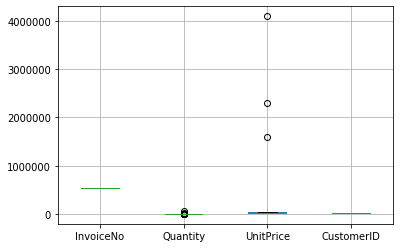

In [4]:
import matplotlib.pyplot as plt
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [ ]:
Langkah selanjutnya bisa dilakukan dengan cara berikut:

Melakukan proses removing outliers pada kolom UnitPrice.
Checking duplikasi and melakukan deduplikasi dataset tersebut!

In [6]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
